1. Identify all NAs in the data.
2. Summary Statistics Table
3. Scatterplots
4. Heat Maps (Correlations)
5. Hypothesis Testing
6. Regression

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.formula.api  as sm

In [2]:
walkable_cities = pd.read_csv("walkable-cities.csv")
walkable_cities

,place_code,city,state,pop_estimate_2021,pop_estimate_2020,state_code,city_state,city_state_code,place_state_code,geo_code,...,households,mean_household_income,mean_income,median_household_income,cost_of_living_index,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,76429,AL,"Auburn, Alabama","Auburn, AL",3076AL,103076.0,...,29136.0,79325.0,29770.0,48531.0,91.9,73331.0,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,200133,AL,"Birmingham, Alabama","Birmingham, AL",7000AL,107000.0,...,87570.0,58012.0,27211.0,36614.0,90.7,189176.0,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,57777,AL,"Decatur, Alabama","Decatur, AL",20104AL,120104.0,...,NaN,NaN,NaN,NaN,88.6,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,71154,AL,"Dothan, Alabama","Dothan, AL",21184AL,121184.0,...,30301.0,70513.0,31168.0,45088.0,86.3,70074.0,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,92687,AL,"Hoover, Alabama","Hoover, AL",35896AL,135896.0,...,36721.0,124562.0,50046.0,99276.0,NaN,91882.0,3.5,51.0,114.0,1922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,77578,WI,"Racine, Wisconsin","Racine, WI",66000WI,5566000.0,...,30885.0,60267.0,24591.0,47861.0,90.9,75661.0,6.4,43.0,291.0,990.0
756,84250,Waukesha,Wisconsin,71256,71365,WI,"Waukesha, Wisconsin","Waukesha, WI",84250WI,5584250.0,...,31139.0,88781.0,38381.0,69533.0,NaN,68468.0,NaN,NaN,67.0,690.0
757,85300,West Allis,Wisconsin,59484,60223,WI,"West Allis, Wisconsin","West Allis, WI",85300WI,5585300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,211.0,1686.0
758,13150,Casper,Wyoming,58656,59242,WY,"Casper, Wyoming","Casper, WY",13150WY,5613150.0,...,NaN,NaN,NaN,NaN,94.2,NaN,NaN,NaN,169.0,1677.0


In [3]:
#uses the loc method to select the subset of rows and columns where the column names are not duplicated. 
walkable_cities = walkable_cities.loc[:,~walkable_cities.columns.duplicated()]
#removes the specified columns from the walkable_cities dataframe
walkable_cities.drop(walkable_cities.columns[[4,5,6,7,8,12]], axis=1, inplace=True)
walkable_cities

,place_code,city,state,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,under_5_years,5_to_9_years,10_to_14_years,...,households,mean_household_income,mean_income,median_household_income,cost_of_living_index,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,103076.0,157.084761,500.137630,4501.0,3784.0,5263.0,...,29136.0,79325.0,29770.0,48531.0,91.9,73331.0,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,107000.0,380.801025,518.840515,9603.0,10905.0,10540.0,...,87570.0,58012.0,27211.0,36614.0,90.7,189176.0,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,120104.0,140.785624,410.581694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,88.6,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,121184.0,232.650562,305.930918,4334.0,4134.0,4855.0,...,30301.0,70513.0,31168.0,45088.0,86.3,70074.0,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,135896.0,124.490626,743.742746,5874.0,6797.0,5227.0,...,36721.0,124562.0,50046.0,99276.0,NaN,91882.0,3.5,51.0,114.0,1922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,5566000.0,40.080067,1924.323130,4632.0,5553.0,6716.0,...,30885.0,60267.0,24591.0,47861.0,90.9,75661.0,6.4,43.0,291.0,990.0
756,84250,Waukesha,Wisconsin,71256,5584250.0,66.102904,1077.955667,3879.0,2841.0,4032.0,...,31139.0,88781.0,38381.0,69533.0,NaN,68468.0,NaN,NaN,67.0,690.0
757,85300,West Allis,Wisconsin,59484,5585300.0,29.477371,2017.954722,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,211.0,1686.0
758,13150,Casper,Wyoming,58656,5613150.0,68.757037,853.090863,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,94.2,NaN,NaN,NaN,169.0,1677.0


In [4]:
walkable_cities.columns

Index(['place_code', 'city', 'state', 'pop_estimate_2021', 'geo_code',
       'land_area_sqkm', 'pop_per_km2', 'under_5_years', '5_to_9_years',
       '10_to_14_years', '15_to_19_years', '20_to_24_years', '25_to_29_years',
       '30_to_34_years', '35_to_39_years', '40_to_44_years', '45_to_49_years',
       '50_to_54_years', '55_to_59_years', '60_to_64_years', '65_to_69_years',
       '70_to_74_years', '75_to_79_years', '80_to_84_years',
       '85_years_and_over', 'male', 'female', 'white_alone',
       'black_or_african_american_alone',
       'american_indian_and_alaska_native_alone', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander_alone',
       'some_other_race_alone', 'two_or_more_races', 'hispanic_or_latino',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 

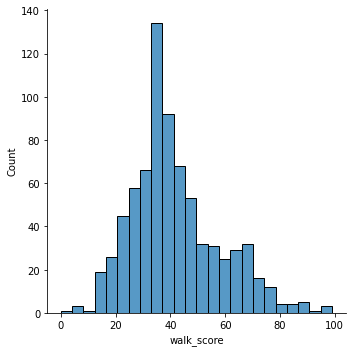

In [28]:
# Select the "col_a" column from the dataframe
hist_walk = walkable_cities['walk_score']

# Plot a histogram of the "col_a" column using seaborn
sns.displot(hist_walk, kde=False)

In [25]:

# Set the maximum number of rows and columns displayed
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Identify all NA values in the dataframe
na_values = walkable_cities.isna().sum()

# Print the resulting dataframe
display(na_values)



place_code                                            0
city                                                  0
state                                                 0
pop_estimate_2021                                     0
geo_code                                              4
land_area_sqkm                                        4
pop_per_km2                                           4
under_5_years                                       196
5_to_9_years                                        196
10_to_14_years                                      196
15_to_19_years                                      196
20_to_24_years                                      196
25_to_29_years                                      196
30_to_34_years                                      196
35_to_39_years                                      196
40_to_44_years                                      196
45_to_49_years                                      196
50_to_54_years                                  

In [32]:
#Linear Regression
model = sm.ols('walk_score ~ obesity', data=walkable_cities).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             walk_score   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     37.44
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.94e-08
Time:                        21:23:16   Log-Likelihood:                -400.62
No. Observations:                 100   AIC:                             805.2
Df Residuals:                      98   BIC:                             810.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.2082      7.826     11.910      0.000      77.677     108.739
obesity       -1.4276      0.233     -6.119      0.000      -1.891      -0.965
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.425
Skew:                           0.104   Prob(JB):                        0.809
Kurtosis:                       3.243   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
walkable_cities.describe()

,place_code,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,under_5_years,5_to_9_years,10_to_14_years,15_to_19_years,20_to_24_years,...,households,mean_household_income,mean_income,median_household_income,cost_of_living_index,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
count,760.000000,7.600000e+02,7.560000e+02,756.000000,756.000000,564.000000,564.000000,564.000000,564.000000,564.000000,...,5.630000e+02,563.000000,564.000000,564.000000,265.000000,5.640000e+02,518.000000,551.000000,633.000000,633.000000
mean,42201.003947,1.646429e+05,2.451419e+06,135.344888,1589.308126,11795.996454,11932.040780,12748.450355,13121.565603,14722.659574,...,7.812289e+04,97922.424512,37995.865248,73858.675532,97.904906,1.958176e+05,6.892085,48.386570,912.489731,4488.963665
std,24175.783004,3.924743e+05,1.704521e+06,186.608511,1505.860211,26392.349754,25518.075231,26885.808694,25532.522353,28887.397208,...,1.752944e+05,33448.610008,13202.716289,26481.199768,13.940996,4.408365e+05,2.587433,18.537954,2971.691617,9964.511150
min,0.000000,5.010400e+04,1.030760e+05,3.238030,93.047234,1904.000000,1630.000000,1788.000000,1829.000000,1774.000000,...,1.607900e+04,49626.000000,17236.000000,32217.000000,82.800000,5.176300e+04,1.300000,15.000000,16.000000,338.000000
25%,21000.000000,6.490600e+04,6.745655e+05,49.981347,797.451711,4606.500000,4791.250000,5062.500000,5418.000000,5157.750000,...,3.045200e+04,75498.000000,28768.500000,55021.250000,89.000000,7.972950e+04,5.100000,38.000000,161.000000,1301.000000
50%,42910.000000,8.838150e+04,2.048412e+06,83.929773,1179.498942,6397.500000,6692.000000,7220.500000,7441.500000,7782.000000,...,4.065300e+04,89800.000000,35076.000000,67973.500000,93.200000,1.049570e+05,6.700000,42.000000,310.000000,2095.000000
75%,62091.000000,1.378420e+05,4.012588e+06,142.740369,1820.268367,10359.750000,10704.500000,11370.250000,12528.000000,14585.000000,...,6.336100e+04,112246.500000,43269.250000,86506.000000,101.700000,1.710892e+05,8.300000,50.000000,648.000000,3736.000000
max,88940.000000,8.467513e+06,5.613900e+06,1935.461994,19691.366525,501350.000000,473352.000000,497694.000000,456072.000000,497526.000000,...,3.263895e+06,268748.000000,102537.000000,205219.000000,178.600000,8.326381e+06,17.400000,122.000000,47821.000000,122299.000000


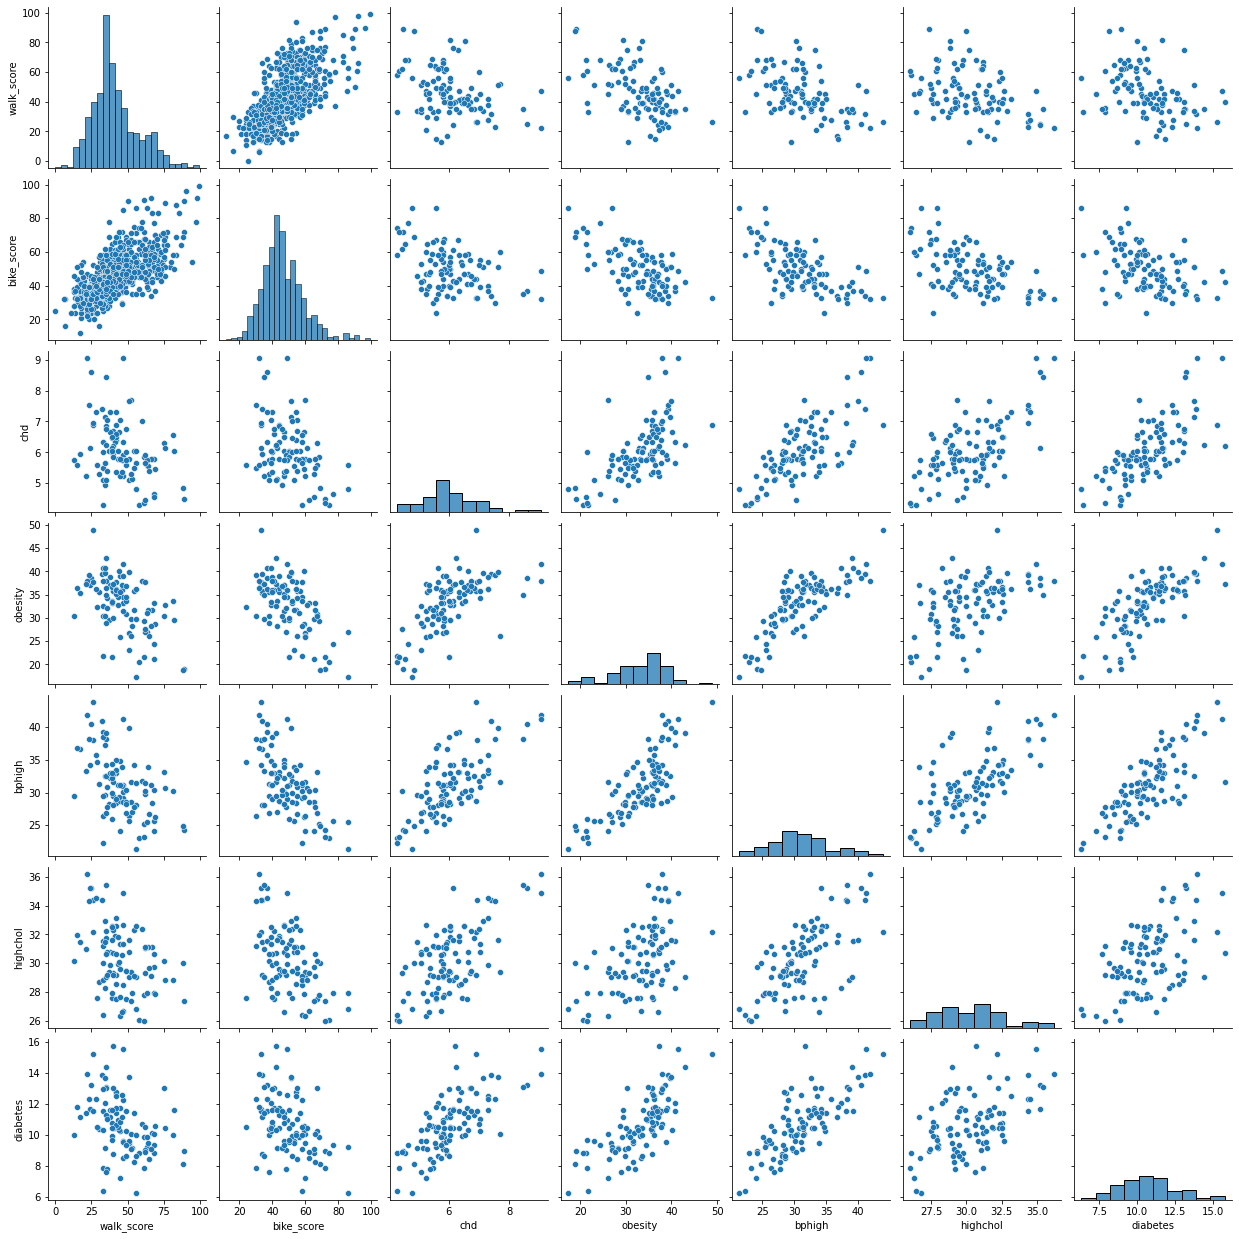

In [7]:
# Create a scatter plot matrix
sns.pairplot(walkable_cities[['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes']])

# Show the plot
plt.show()

In [8]:
# Select the columns you want to plot
columns = ['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes']

# Create a pivot table with the columns as the index and columns, and the values as the entries
pivot_table = walkable_cities[columns].pivot_table(index=columns, columns=columns)

pivot_table



walk_score,bike_score,chd,obesity,bphigh,highchol,diabetes
13,38,5.75,30.50,29.45,30.15,10.00
15,32,5.60,36.50,36.85,31.95,11.80
17,34,5.95,35.25,36.70,31.45,11.20
21,35,5.25,37.20,33.35,30.95,11.45
22,32,9.05,37.95,41.85,36.20,13.95
...,...,...,...,...,...,...
75,67,6.30,30.35,33.20,30.15,13.05
76,61,6.15,32.80,30.70,28.85,10.45
81,58,6.55,33.60,30.30,28.85,10.00
88,69,4.85,18.90,24.80,30.00,8.15


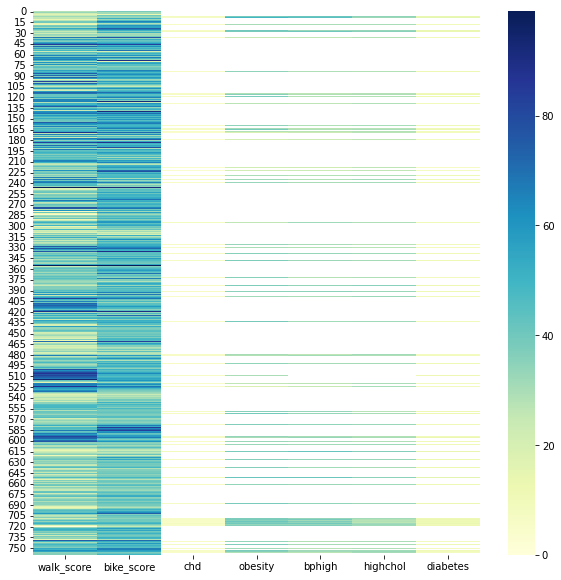

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(walkable_cities[['walk_score', 'bike_score', 'obesity', 'bphigh', 'highchol']], cmap="YlGnBu")
# Create a heat map from the pivot table
#sns.heatmap(pivot_table, cmap="YlGnBu")

# Show the plot
plt.show()

In [10]:
top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
top_neg_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]

<ipython-input-10-bff32d2a3101>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
<ipython-input-10-bff32d2a3101>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
<ipython-input-10-bff32d2a3101>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_neg_corr_bike = walkable_cities.corr()['walk_sc

In [11]:
top_neg_corr_walk

drive_commute   -0.516712
bphigh          -0.506703
arthritis       -0.464757
csmoking        -0.418036
highchol        -0.394880
depression      -0.380548
diabetes        -0.368791
stroke          -0.366749
copd            -0.361980
teethlost       -0.351482
Name: walk_score, dtype: float64

In [12]:
top_pos_corr_walk

pop_per_km2               0.717293
bike_score                0.669675
public_transit_commute    0.624452
cost_of_living_index      0.498944
walk_commute              0.412196
unemployment_rate         0.319987
bike_commute              0.294994
work_from_home            0.244206
25_to_29_years            0.241073
dental                    0.240685
Name: walk_score, dtype: float64

In [13]:
# Create an empty dataframe with four columns
corr_df = pd.DataFrame(columns=['top_neg_corr_walk', 'top_pos_corr_walk', 'top_neg_corr_bike', 'top_pos_corr_bike'])

# Assign the values of the variables to the corresponding columns
corr_df['top_neg_corr_walk'] = top_neg_corr_walk
corr_df['top_pos_corr_walk'] = top_pos_corr_walk
corr_df['top_neg_corr_bike'] = top_neg_corr_bike
corr_df['top_pos_corr_bike'] = top_pos_corr_bike

# Print the resulting dataframe
corr_df

,top_neg_corr_walk,top_pos_corr_walk,top_neg_corr_bike,top_pos_corr_bike
drive_commute,-0.516712,NaN,-0.516712,NaN
bphigh,-0.506703,NaN,-0.506703,NaN
arthritis,-0.464757,NaN,-0.464757,NaN
csmoking,-0.418036,NaN,-0.418036,NaN
highchol,-0.394880,NaN,-0.394880,NaN
depression,-0.380548,NaN,-0.380548,NaN
diabetes,-0.368791,NaN,-0.368791,NaN
stroke,-0.366749,NaN,-0.366749,NaN
copd,-0.361980,NaN,-0.361980,NaN
teethlost,-0.351482,NaN,-0.351482,NaN
